# Mid-bootcamp project

#### Importing  libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Reading the dataset and have a breif look at it

In [2]:
bike_data = pd.read_csv('Fahrrad.csv', encoding="latin1")

In [3]:
display(bike_data.head(10))
display(bike_data.shape)
display(bike_data.info())

,ANGELEGT_AM,TATZEIT_ANFANG_DATUM,TATZEIT_ANFANG_STUNDE,TATZEIT_ENDE_DATUM,TATZEIT_ENDE_STUNDE,LOR,SCHADENSHOEHE,VERSUCH,ART_DES_FAHRRADS,DELIKT,ERFASSUNGSGRUND
0,01.06.2023,30.05.2023,18,31.05.2023,7,3601244,1095,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
1,01.06.2023,31.05.2023,23,01.06.2023,13,11400928,300,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2,01.06.2023,01.06.2023,20,01.06.2023,20,8401243,0,Nein,Mountainbike,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
3,01.06.2023,31.05.2023,9,31.05.2023,16,4300621,0,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
4,01.06.2023,31.05.2023,9,31.05.2023,18,2100104,1350,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
5,01.06.2023,31.05.2023,19,01.06.2023,9,3601450,1000,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
6,01.06.2023,31.05.2023,17,01.06.2023,8,3701659,600,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
7,01.06.2023,31.05.2023,17,01.06.2023,8,4300620,2300,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
8,01.06.2023,30.05.2023,12,30.05.2023,20,10100315,540,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
9,01.06.2023,30.05.2023,18,31.05.2023,10,2400624,699,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


(30440, 11)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30440 entries, 0 to 30439
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   ANGELEGT_AM            30440 non-null  object
 1   TATZEIT_ANFANG_DATUM   30440 non-null  object
 2   TATZEIT_ANFANG_STUNDE  30440 non-null  int64 
 3   TATZEIT_ENDE_DATUM     30440 non-null  object
 4   TATZEIT_ENDE_STUNDE    30440 non-null  int64 
 5   LOR                    30440 non-null  int64 
 6   SCHADENSHOEHE          30440 non-null  int64 
 7   VERSUCH                30440 non-null  object
 8   ART_DES_FAHRRADS       30440 non-null  object
 9   DELIKT                 30440 non-null  object
 10  ERFASSUNGSGRUND        30440 non-null  object
dtypes: int64(4), object(7)
memory usage: 2.6+ MB


None

In [4]:
bike_data.dtypes # checking the datatypes

ANGELEGT_AM              object
TATZEIT_ANFANG_DATUM     object
TATZEIT_ANFANG_STUNDE     int64
TATZEIT_ENDE_DATUM       object
TATZEIT_ENDE_STUNDE       int64
LOR                       int64
SCHADENSHOEHE             int64
VERSUCH                  object
ART_DES_FAHRRADS         object
DELIKT                   object
ERFASSUNGSGRUND          object
dtype: object

### Changing columns headers to snake case.

In [5]:
bike_data.columns = [x.lower() for x in bike_data.columns]
bike_data.columns = bike_data.columns.str.replace("[ ]", "_", regex=True)
bike_data

,angelegt_am,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund
0,01.06.2023,30.05.2023,18,31.05.2023,7,3601244,1095,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
1,01.06.2023,31.05.2023,23,01.06.2023,13,11400928,300,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
2,01.06.2023,01.06.2023,20,01.06.2023,20,8401243,0,Nein,Mountainbike,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
3,01.06.2023,31.05.2023,9,31.05.2023,16,4300621,0,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
4,01.06.2023,31.05.2023,9,31.05.2023,18,2100104,1350,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
...,...,...,...,...,...,...,...,...,...,...,...
30435,02.01.2022,01.01.2022,19,02.01.2022,18,9501940,449,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
30436,01.01.2022,01.01.2022,4,01.01.2022,8,2100106,190,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern
30437,01.01.2022,01.01.2022,14,01.01.2022,14,3601142,1000,Nein,Herrenfahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern
30438,01.01.2022,01.01.2022,16,01.01.2022,19,2400623,1754,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern


### Checking for duplicates

In [6]:
bike_data.duplicated().sum() #I decided to keep the duplicates in as they might be just identical data points (for example several reports from different people at the same time)

56

### Checking for Nan values

In [7]:
bike_data.isnull().sum()

angelegt_am              0
tatzeit_anfang_datum     0
tatzeit_anfang_stunde    0
tatzeit_ende_datum       0
tatzeit_ende_stunde      0
lor                      0
schadenshoehe            0
versuch                  0
art_des_fahrrads         0
delikt                   0
erfassungsgrund          0
dtype: int64

### Working on the "LOR" column. (Lebensweltlich orientierte Räume (LOR) in Berlin)

In [8]:
bike_data['lor'].value_counts()

9100101    311
2300419    299
1100310    230
2500835    220
1300836    219
          ... 
8401140      2
9301227      2
7601547      2
5300838      1
5200422      1
Name: lor, Length: 540, dtype: int64

As the Lor column has very precise geographical data, I decided to merge it into larger groups defined by the Berlin planning authorities. Description and geo info for Berlin's LOR is under https://www.berlin.de/sen/sbw/stadtdaten/stadtwissen/sozialraumorientierte-planungsgrundlagen/lebensweltlich-orientierte-raeume/

In [9]:
# Addint the new column 'district' with the name of the district
district = []
for row in bike_data['lor']:
    if 1000000 <= row < 2000000:
        district.append('Mitte')
    elif 2000000 <= row < 3000000:
        district.append('Friedrichshain-Kreuzberg')
    elif 3000000 <= row < 4000000:
        district.append('Pankow')
    elif 4000000 <= row < 5000000:
        district.append('Charlottenburg-Wilmersdorf')
    elif 5000000 <= row < 6000000:
        district.append('Spandau')
    elif 6000000 <= row < 7000000:
        district.append('Steglitz-Zehlendorf')
    elif 7000000 <= row < 8000000:
        district.append('Tempelhof-Schöneberg')
    elif 8000000 <= row < 9000000:
        district.append('Neukölln')
    elif 9000000 <= row < 10000000:
        district.append('Treptow-Köpenick')
    elif 10000000 <= row < 11000000:
        district.append('Marzahn-Hellersdorf')
    elif 11000000 <= row < 12000000:
        district.append('Lichtenberg')
    else:
        district.append('Reinickendorf')
bike_data['district'] = district

In [10]:
bike_data['district'].value_counts()

Mitte                         4879
Friedrichshain-Kreuzberg      4463
Pankow                        4283
Charlottenburg-Wilmersdorf    2990
Tempelhof-Schöneberg          2721
Neukölln                      2249
Treptow-Köpenick              2145
Steglitz-Zehlendorf           1925
Lichtenberg                   1761
Reinickendorf                 1156
Marzahn-Hellersdorf            996
Spandau                        872
Name: district, dtype: int64

### Reading second dataframe into on crime in Berlin to extract info on the querters and street names.

In [14]:
# 'crime = pd.read_excel('Fallzahlen&HZ 2013-2022.xlsx', sheet_name = 'HZ_2022', skiprows=4)' - found a better file

In [15]:
lor_data = pd.read_csv('Berlin_LOR_code.csv', encoding="latin1", delimiter= ';')
lor_data

,Berlin_code_area,Administrative_district,District,Quarter,Street_name
0,1100101,Mitte,Zentrum,Tiergarten Süd,Stülerstraße
1,1100102,Mitte,Zentrum,Tiergarten Süd,Großer Tiergarten
2,1100103,Mitte,Zentrum,Tiergarten Süd,Lützowstraße
3,1100104,Mitte,Zentrum,Tiergarten Süd,Körnerstraße
4,1100205,Mitte,Zentrum,Regierungsviertel,Wilhelmstraße
...,...,...,...,...,...
537,12601032,Reinickendorf,Märkisches Viertel,Rollbergesiedlung,Rollbergesiedlung
538,12601133,Reinickendorf,Märkisches Viertel,MV Nord,Treuenbrietzener Straße
539,12601134,Reinickendorf,Märkisches Viertel,MV Nord,Märkisches Zentrum
540,12601235,Reinickendorf,Märkisches Viertel,MV Süd,Dannenwalder Weg


#### Editing and renaming some of the columns

In [17]:
lor_data  = lor_data.rename(columns={'Berlin_code_area' : 'lor'})

### Joining dataframes on the LOR column to get the sub-bezirks names

In [18]:
bike_data = pd.merge(bike_data, lor_data[["District", 'Quarter', 'Street_name', "lor"]], on="lor", how="left")

In [19]:
bike_data

,angelegt_am,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund,district,District,Quarter,Street_name
0,01.06.2023,30.05.2023,18,31.05.2023,7,3601244,1095,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nord,Humannplatz
1,01.06.2023,31.05.2023,23,01.06.2023,13,11400928,300,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Lichtenberg,Lichtenberg Mitte,Neu-Lichtenberg,Nöldnerplatz
2,01.06.2023,01.06.2023,20,01.06.2023,20,8401243,0,Nein,Mountainbike,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Neukölln,Buckow Nord/Rudow,Rudow,Alt-Rudow
3,01.06.2023,31.05.2023,9,31.05.2023,16,4300621,0,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Charlottenburg-Wilmersdorf,Charlottenburg Zentrum,Otto-Suhr-Allee/Kantstraße,Richard-Wagner-Straße
4,01.06.2023,31.05.2023,9,31.05.2023,18,2100104,1350,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30435,02.01.2022,01.01.2022,19,02.01.2022,18,9501940,449,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Treptow-Köpenick,Treptow-Köpenick 5,Dammvorstadt,Güterbahnhof Köpenick
30436,01.01.2022,01.01.2022,4,01.01.2022,8,2100106,190,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Wassertorplatz
30437,01.01.2022,01.01.2022,14,01.01.2022,14,3601142,1000,Nein,Herrenfahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nordwest,Falkplatz
30438,01.01.2022,01.01.2022,16,01.01.2022,19,2400623,1754,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Friedrichshain West,Karl-Marx-Allee Süd,Andreasviertel


In [21]:
lor_data = lor_data.rename(columns={'BZR_NAME' : 'bezirk'})

In [22]:
bike_data.isna().sum().sum()# double checking if any unexpected NaN value appeared in the datasframe

0

## Data wrangling - dates and times 

In [23]:
#Chanding dates to dateime firmat
bike_data[['angelegt_am', 'tatzeit_anfang_datum', 'tatzeit_ende_datum']] = bike_data[['angelegt_am', 'tatzeit_anfang_datum', 'tatzeit_ende_datum']].apply(pd.to_datetime)

C:\Users\valiu\AppData\Local\Temp\ipykernel_16784\3008049064.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bike_data[['angelegt_am', 'tatzeit_anfang_datum', 'tatzeit_ende_datum']] = bike_data[['angelegt_am', 'tatzeit_anfang_datum', 'tatzeit_ende_datum']].apply(pd.to_datetime)
C:\Users\valiu\AppData\Local\Temp\ipykernel_16784\3008049064.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  bike_data[['angelegt_am', 'tatzeit_anfang_datum', 'tatzeit_ende_datum']] = bike_data[['angelegt_am', 'tatzeit_anfang_datum', 'tatzeit_ende_datum']].apply(pd.to_datetime)
C:\Users\valiu\AppData\Local\Temp\ipykernel_16784\3008049064.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the de

In [24]:
bike_data

,angelegt_am,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund,district,District,Quarter,Street_name
0,2023-01-06,2023-05-30,18,2023-05-31,7,3601244,1095,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nord,Humannplatz
1,2023-01-06,2023-05-31,23,2023-01-06,13,11400928,300,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Lichtenberg,Lichtenberg Mitte,Neu-Lichtenberg,Nöldnerplatz
2,2023-01-06,2023-01-06,20,2023-01-06,20,8401243,0,Nein,Mountainbike,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Neukölln,Buckow Nord/Rudow,Rudow,Alt-Rudow
3,2023-01-06,2023-05-31,9,2023-05-31,16,4300621,0,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Charlottenburg-Wilmersdorf,Charlottenburg Zentrum,Otto-Suhr-Allee/Kantstraße,Richard-Wagner-Straße
4,2023-01-06,2023-05-31,9,2023-05-31,18,2100104,1350,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30435,2022-02-01,2022-01-01,19,2022-02-01,18,9501940,449,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Treptow-Köpenick,Treptow-Köpenick 5,Dammvorstadt,Güterbahnhof Köpenick
30436,2022-01-01,2022-01-01,4,2022-01-01,8,2100106,190,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Wassertorplatz
30437,2022-01-01,2022-01-01,14,2022-01-01,14,3601142,1000,Nein,Herrenfahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nordwest,Falkplatz
30438,2022-01-01,2022-01-01,16,2022-01-01,19,2400623,1754,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Friedrichshain West,Karl-Marx-Allee Süd,Andreasviertel


### Finding the midpoint in time between the start and the end of the crime to have a more clear representation. 

In [25]:
import datetime as dt
from datetime import datetime
import math

In [26]:
# changing the format to the datetime
bike_data['tatzeit_anfang_stunde'] = pd.to_datetime(bike_data['tatzeit_anfang_stunde'], format="%H", errors='coerce').dt.time

In [27]:
bike_data['tatzeit_ende_stunde'] = pd.to_datetime(bike_data['tatzeit_ende_stunde'], format="%H", errors='coerce').dt.time

In [28]:
# Calculate the midpoint
midpoint_times = []
for row in bike_data.itertuples():
    datetime1 = dt.datetime.combine(dt.date.today(), row.tatzeit_anfang_stunde)
    datetime2 = dt.datetime.combine(dt.date.today(), row.tatzeit_ende_stunde)

    if datetime2 < datetime1:
        datetime2 += dt.timedelta(days=1)

    time_diff = datetime2 - datetime1
    minutes_diff = time_diff.total_seconds() / 60
    midpoint_minutes = minutes_diff / 2

    midpoint = datetime1 + dt.timedelta(minutes=midpoint_minutes)

    # Round up to the next hour
    rounded_midpoint = dt.datetime.combine(dt.date.today(), dt.time(math.ceil(midpoint.hour), 0))

    midpoint_times.append(rounded_midpoint.time())

# Add the midpoint values to the DataFrame

bike_data['midpoint'] = midpoint_times


In [29]:
bike_data['midpoint'].value_counts()

01:00:00    2294
02:00:00    2234
00:00:00    1850
03:00:00    1728
12:00:00    1695
11:00:00    1631
13:00:00    1620
14:00:00    1508
16:00:00    1433
15:00:00    1362
17:00:00    1325
18:00:00    1303
04:00:00    1180
19:00:00    1177
10:00:00    1171
20:00:00    1148
23:00:00    1122
21:00:00     908
22:00:00     801
05:00:00     794
09:00:00     622
06:00:00     568
07:00:00     487
08:00:00     479
Name: midpoint, dtype: int64

## Creating a new column - morning-day-evening-night

In [30]:
day_time = []
for row in bike_data['midpoint']:
    hour = row.hour
    if 5 <= hour < 11:
        day_time.append('Morning')
    elif 11 <= hour < 17:
        day_time.append('Afternoon')
    elif 17 <= hour <= 23:
        day_time.append('Evening')
    else:
        day_time.append('Night')
bike_data['day_time'] = day_time

In [31]:
bike_data['day_time'].value_counts()

Night        9286
Afternoon    9249
Evening      7784
Morning      4121
Name: day_time, dtype: int64

### Creating columns for day and month for descriptive analysis

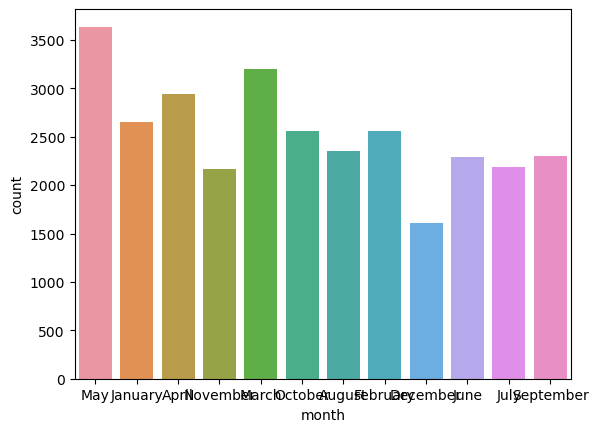

In [32]:
# Plot 
bike_data['month'] = bike_data['tatzeit_ende_datum'].dt.strftime('%B')
bike_data['day'] = bike_data['tatzeit_ende_datum'].dt.strftime('%A')
sns.countplot(x=bike_data['month'], data=bike_data)
plt.show()

<Axes: xlabel='day', ylabel='count'>

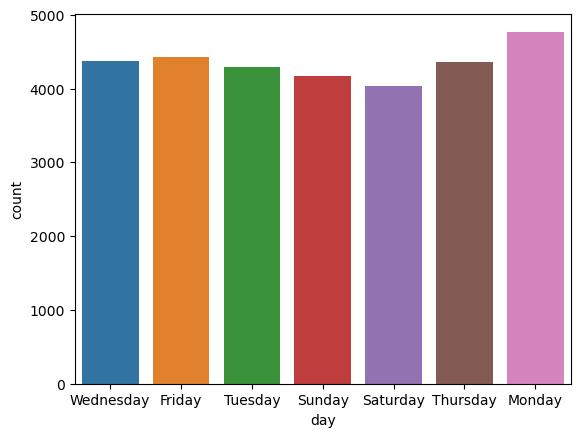

In [33]:
sns.countplot(x=bike_data['day'], data=bike_data)

In [34]:
# trying to see if I would have a different pattern for months if I only filter 2022 (as the dataset partially includes the datae for 2023)

bike_data2 = bike_data[(bike_data['tatzeit_ende_datum'] > "2021-12-31") & (bike_data['tatzeit_ende_datum']  < "2023-01-01")]
bike_data2

,angelegt_am,tatzeit_anfang_datum,tatzeit_anfang_stunde,tatzeit_ende_datum,tatzeit_ende_stunde,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund,district,District,Quarter,Street_name,midpoint,day_time,month,day
189,2023-05-30,2022-03-15,07:00:00,2022-03-15,17:00:00,1401049,500,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Mitte,Wedding,Wedding Zentrum,Schulstraße,12:00:00,Afternoon,March,Tuesday
568,2023-05-23,2022-05-22,10:00:00,2022-05-22,10:00:00,2500833,2000,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Friedrichshain Ost,Frankfurter Allee Süd FK,Boxhagener Platz,10:00:00,Morning,May,Sunday
627,2023-05-23,2022-05-21,12:00:00,2022-05-21,18:00:00,2300315,90,Nein,Fahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Kreuzberg Ost,Nördliche Luisenstadt,Lausitzer Platz,15:00:00,Afternoon,May,Saturday
653,2023-05-23,2022-12-22,18:00:00,2022-12-23,09:00:00,1401044,1000,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Mitte,Wedding,Wedding Zentrum,Uferstraße,01:00:00,Night,December,Friday
673,2023-05-22,2022-05-18,02:00:00,2022-05-18,04:00:00,2300316,3999,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Kreuzberg Ost,Nördliche Luisenstadt,Köpenicker Straße,03:00:00,Night,May,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30435,2022-02-01,2022-01-01,19:00:00,2022-02-01,18:00:00,9501940,449,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Treptow-Köpenick,Treptow-Köpenick 5,Dammvorstadt,Güterbahnhof Köpenick,06:00:00,Morning,February,Tuesday
30436,2022-01-01,2022-01-01,04:00:00,2022-01-01,08:00:00,2100106,190,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Wassertorplatz,06:00:00,Morning,January,Saturday
30437,2022-01-01,2022-01-01,14:00:00,2022-01-01,14:00:00,3601142,1000,Nein,Herrenfahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nordwest,Falkplatz,14:00:00,Afternoon,January,Saturday
30438,2022-01-01,2022-01-01,16:00:00,2022-01-01,19:00:00,2400623,1754,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Friedrichshain West,Karl-Marx-Allee Süd,Andreasviertel,17:00:00,Evening,January,Saturday


C:\Users\valiu\AppData\Local\Temp\ipykernel_16784\2529251878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data2['month'] = bike_data2['tatzeit_ende_datum'].dt.strftime('%B')
C:\Users\valiu\AppData\Local\Temp\ipykernel_16784\2529251878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bike_data2['day'] = bike_data2['tatzeit_ende_datum'].dt.strftime('%A')


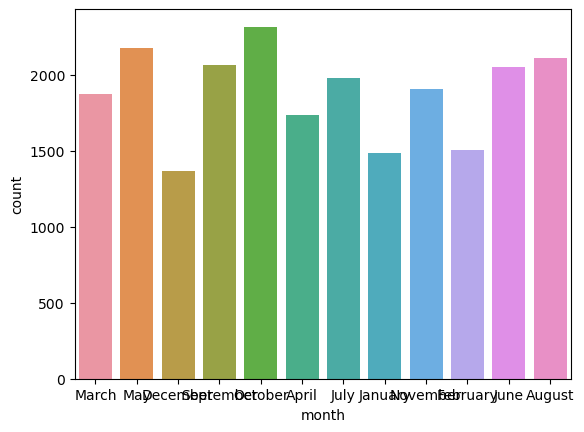

In [35]:
bike_data2['month'] = bike_data2['tatzeit_ende_datum'].dt.strftime('%B')
bike_data2['day'] = bike_data2['tatzeit_ende_datum'].dt.strftime('%A')
sns.countplot(x=bike_data2['month'], data=bike_data2)
plt.show()

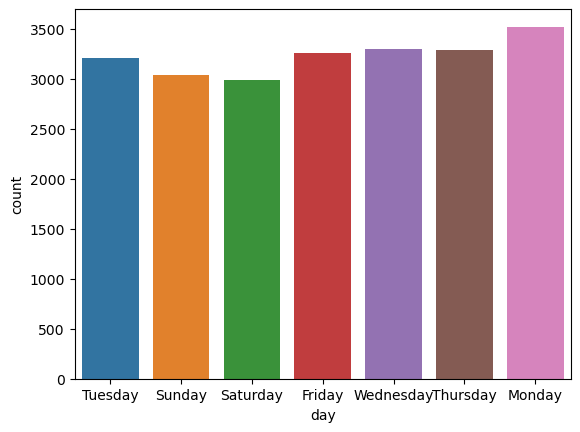

In [36]:
sns.countplot(x=bike_data2['day'], data=bike_data2)
plt.show()

### Making a decision on which columns to drop

In [37]:
bike_data.columns

Index(['angelegt_am', 'tatzeit_anfang_datum', 'tatzeit_anfang_stunde',
       'tatzeit_ende_datum', 'tatzeit_ende_stunde', 'lor', 'schadenshoehe',
       'versuch', 'art_des_fahrrads', 'delikt', 'erfassungsgrund', 'district',
       'District', 'Quarter', 'Street_name', 'midpoint', 'day_time', 'month',
       'day'],
      dtype='object')

In [38]:
bike_data = bike_data.drop(columns=['tatzeit_anfang_datum', 'tatzeit_anfang_stunde', 'tatzeit_ende_stunde'], axis=1)

In [39]:
bike_data

,angelegt_am,tatzeit_ende_datum,lor,schadenshoehe,versuch,art_des_fahrrads,delikt,erfassungsgrund,district,District,Quarter,Street_name,midpoint,day_time,month,day
0,2023-01-06,2023-05-31,3601244,1095,Nein,Damenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nord,Humannplatz,00:00:00,Night,May,Wednesday
1,2023-01-06,2023-01-06,11400928,300,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Lichtenberg,Lichtenberg Mitte,Neu-Lichtenberg,Nöldnerplatz,06:00:00,Morning,January,Friday
2,2023-01-06,2023-01-06,8401243,0,Nein,Mountainbike,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Neukölln,Buckow Nord/Rudow,Rudow,Alt-Rudow,20:00:00,Evening,January,Friday
3,2023-01-06,2023-05-31,4300621,0,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Charlottenburg-Wilmersdorf,Charlottenburg Zentrum,Otto-Suhr-Allee/Kantstraße,Richard-Wagner-Straße,12:00:00,Afternoon,May,Wednesday
4,2023-01-06,2023-05-31,2100104,1350,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz,13:00:00,Afternoon,May,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30435,2022-02-01,2022-02-01,9501940,449,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Treptow-Köpenick,Treptow-Köpenick 5,Dammvorstadt,Güterbahnhof Köpenick,06:00:00,Morning,February,Tuesday
30436,2022-01-01,2022-01-01,2100106,190,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Wassertorplatz,06:00:00,Morning,January,Saturday
30437,2022-01-01,2022-01-01,3601142,1000,Nein,Herrenfahrrad,Fahrraddiebstahl,Einfacher Diebstahl von Fahrrädern,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nordwest,Falkplatz,14:00:00,Afternoon,January,Saturday
30438,2022-01-01,2022-01-01,2400623,1754,Nein,Herrenfahrrad,Fahrraddiebstahl,Sonstiger schwerer Diebstahl von Fahrrädern,Friedrichshain-Kreuzberg,Friedrichshain West,Karl-Marx-Allee Süd,Andreasviertel,17:00:00,Evening,January,Saturday


## Some more looking into data in columns

### Schadenshöhe

In [40]:
bike_data['schadenshoehe'].value_counts

<bound method IndexOpsMixin.value_counts of 0        1095
1         300
2           0
3           0
4        1350
         ... 
30435     449
30436     190
30437    1000
30438    1754
30439     150
Name: schadenshoehe, Length: 30440, dtype: int64>

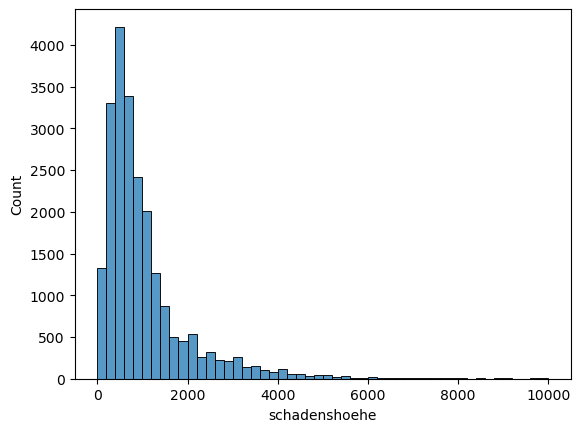

In [41]:
sns.histplot(bike_data2['schadenshoehe'], bins = 50)
plt.show()

<Axes: >

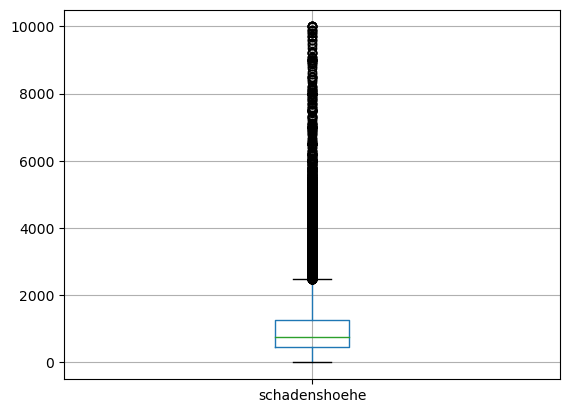

In [42]:
# do I need to cut outliers fi am not modelling
bike_data.boxplot(column=['schadenshoehe']) 

In [43]:
# There seems to be no real outliers in this case

### Versuch

In [44]:
bike_data['versuch'].value_counts()

Nein         30341
Ja              89
Unbekannt       10
Name: versuch, dtype: int64

In [45]:
# I don't see real value in this coulm, therefore the column is dropped. 

In [46]:
bike_data = bike_data.drop(['versuch'], axis=1)

### Art_des_fahrrads

In [47]:
bike_data['art_des_fahrrads'].value_counts()

Herrenfahrrad        14174
Damenfahrrad          8200
Fahrrad               4279
Mountainbike          1250
Kinderfahrrad         1196
diverse Fahrräder      796
Rennrad                466
Lastenfahrrad           79
Name: art_des_fahrrads, dtype: int64

As 'Fahrad' only means bycile i decided to combine Fahrrad and diverse Fahrräder into one group.

In [48]:
def cleanart(x):
    if 'Fahrrad' in x:
        return "diverse Fahrräder"
    else:
        return  x
bike_data['art_des_fahrrads'] = list(map(cleanart, bike_data['art_des_fahrrads']))
bike_data['art_des_fahrrads'].value_counts()

Herrenfahrrad        14174
Damenfahrrad          8200
diverse Fahrräder     5075
Mountainbike          1250
Kinderfahrrad         1196
Rennrad                466
Lastenfahrrad           79
Name: art_des_fahrrads, dtype: int64

### Delikt

In [49]:
bike_data['delikt'].value_counts()

Fahrraddiebstahl             29048
Keller- und Bodeneinbruch     1392
Name: delikt, dtype: int64

### Erfassungsgrund

In [50]:
bike_data2['erfassungsgrund'].value_counts()

Sonstiger schwerer Diebstahl von Fahrrädern                        20500
Einfacher Diebstahl von Fahrrädern                                  1126
Sonstiger schwerer Diebstahl in/aus Keller/Boden von Fahrrädern      925
Einfacher Diebstahl aus Keller/Boden von Fahrrädern                   36
Name: erfassungsgrund, dtype: int64

After reading the metadata, I found that 'einfacher diebstahl' (simple theft) was the unlocked bikes and schwerer diebstahl (grand theft) was the locked bikes. I decided to group this column into only two values as we have the location of the offence in another column.

In [51]:
def grundt(x):
    if 'Sonstiger schwerer Diebstahl von Fahrrädern' in x:
        return "locked"
    elif 'Sonstiger schwerer Diebstahl in/aus Keller/Boden von Fahrrädern' in x:
        return "locked"
    else:
        return  "unlocked"
bike_data['erfassungsgrund'] = list(map(grundt, bike_data['erfassungsgrund']))
bike_data['erfassungsgrund'].value_counts()

locked      28893
unlocked     1547
Name: erfassungsgrund, dtype: int64

#### Double checking the dataset


In [52]:
for col in bike_data:
    display(bike_data[col].unique())

array(['2023-01-06T00:00:00.000000000', '2023-05-31T00:00:00.000000000',
       '2023-05-30T00:00:00.000000000', '2023-05-29T00:00:00.000000000',
       '2023-05-28T00:00:00.000000000', '2023-05-27T00:00:00.000000000',
       '2023-05-26T00:00:00.000000000', '2023-05-25T00:00:00.000000000',
       '2023-05-24T00:00:00.000000000', '2023-05-23T00:00:00.000000000',
       '2023-05-22T00:00:00.000000000', '2023-05-21T00:00:00.000000000',
       '2023-05-20T00:00:00.000000000', '2023-05-19T00:00:00.000000000',
       '2023-05-18T00:00:00.000000000', '2023-05-17T00:00:00.000000000',
       '2023-05-16T00:00:00.000000000', '2023-05-15T00:00:00.000000000',
       '2023-05-14T00:00:00.000000000', '2023-05-13T00:00:00.000000000',
       '2023-12-05T00:00:00.000000000', '2023-11-05T00:00:00.000000000',
       '2023-10-05T00:00:00.000000000', '2023-09-05T00:00:00.000000000',
       '2023-08-05T00:00:00.000000000', '2023-07-05T00:00:00.000000000',
       '2023-06-05T00:00:00.000000000', '2023-05-05

array(['2023-05-31T00:00:00.000000000', '2023-01-06T00:00:00.000000000',
       '2023-05-30T00:00:00.000000000', '2023-05-28T00:00:00.000000000',
       '2023-05-27T00:00:00.000000000', '2023-05-21T00:00:00.000000000',
       '2023-05-26T00:00:00.000000000', '2023-05-24T00:00:00.000000000',
       '2023-05-25T00:00:00.000000000', '2023-05-29T00:00:00.000000000',
       '2023-05-16T00:00:00.000000000', '2023-05-19T00:00:00.000000000',
       '2023-04-14T00:00:00.000000000', '2023-05-22T00:00:00.000000000',
       '2023-11-05T00:00:00.000000000', '2022-03-15T00:00:00.000000000',
       '2023-05-20T00:00:00.000000000', '2023-04-30T00:00:00.000000000',
       '2023-05-13T00:00:00.000000000', '2023-05-18T00:00:00.000000000',
       '2023-03-05T00:00:00.000000000', '2023-04-28T00:00:00.000000000',
       '2023-10-05T00:00:00.000000000', '2023-05-17T00:00:00.000000000',
       '2023-05-14T00:00:00.000000000', '2023-05-23T00:00:00.000000000',
       '2023-01-05T00:00:00.000000000', '2023-04-24

array([ 3601244, 11400928,  8401243,  4300621,  2100104,  3601450,
        3701659,  4300620, 10100315,  2400624, 12500927,  1100104,
       11400931,  7400824, 12100204,  3701657,  9200715,  9100408,
        1100313,  9200510,  9100101,  7200308,  1100414,  7200412,
       11200410,  3601245,  4501153,  1400942,  4501043,  6200313,
        3400725,  1401046,  2500832,  6100102, 11400930,  3400620,
        1100206,  6300526,  2500830,  7501134, 11401034, 11200512,
        2400520,  1100312, 10100208, 12500824,  3500936,  9200511,
        2400625, 10100207,  4501042,  2500836,  9401534,  2200209,
        2200210,  1100207,  3701660,  4400834,  2100106,  8100416,
        4300416,  2500729,  4501045,  1300834,  6400839,  7601238,
        3601140,  8100418,  9501939,  4501040,  9100305,  3400619,
        1300836, 11300826,  1100308,  7601340,  6300528, 11401033,
        1100310,  1100415, 11300617, 11400929, 12601032,  6400840,
        6400735,  6400838,  6100206,  1401047,  1100102,  4400

array([1095,  300,    0, ..., 2531, 2445, 1698], dtype=int64)

array(['Damenfahrrad', 'Herrenfahrrad', 'Mountainbike', 'Rennrad',
       'Kinderfahrrad', 'diverse Fahrräder', 'Lastenfahrrad'],
      dtype=object)

array(['Fahrraddiebstahl', 'Keller- und Bodeneinbruch'], dtype=object)

array(['locked', 'unlocked'], dtype=object)

array(['Pankow', 'Lichtenberg', 'Neukölln', 'Charlottenburg-Wilmersdorf',
       'Friedrichshain-Kreuzberg', 'Marzahn-Hellersdorf', 'Reinickendorf',
       'Mitte', 'Tempelhof-Schöneberg', 'Treptow-Köpenick',
       'Steglitz-Zehlendorf', 'Spandau'], dtype=object)

array(['Nördlicher Prenzlauer Berg', 'Lichtenberg Mitte',
       'Buckow Nord/Rudow', 'Charlottenburg Zentrum', 'Kreuzberg Nord',
       'Südlicher Prenzlauer Berg', 'Marzahn', 'Friedrichshain West',
       'Wittenau/Borsigwalde', 'Zentrum', 'Tempelhof',
       'Reinickendorf Ost', 'Treptow-Köpenick 2', 'Treptow-Köpenick 1',
       'Schöneberg Süd', 'Hohenschönhausen Süd', 'Wilmersdorf Zentrum',
       'Wedding', 'Lankwitz/Lichterfelde Ost', 'Südliches Pankow',
       'Friedrichshain Ost', 'Steglitz',
       'Zehlendorf Süd/Lichterfelde West', 'Mariendorf',
       'Südliches Weißensee', 'Treptow-Köpenick 4', 'Kreuzberg Süd',
       'Wilmersdorf Süd', 'Neukölln', 'Gesundbrunnen',
       'Zehlendorf Nord/Wannsee', 'Marienfelde / Lichtenrade',
       'Treptow-Köpenick 5', 'Lichtenberg Nord', 'Märkisches Viertel',
       'Hellersdorf', 'Biesdorf', 'Tegel', 'Schöneberg Nord',
       'Hohenschönhausen Nord', 'Kreuzberg Ost', 'Grüner Norden',
       'Kaulsdorf/Mahlsdorf', 'Friedenau', 'Buch',

array(['Prenzlauer Berg Nord', 'Neu-Lichtenberg', 'Rudow',
       'Otto-Suhr-Allee/Kantstraße', 'Südliche Friedrichstadt',
       'Prenzlauer Berg Ost', 'Prenzlauer Berg Süd', 'Marzahn Süd',
       'Karl-Marx-Allee Süd', 'Nord 2 - Waidmannslust/Wittenau/Lübars',
       'Tiergarten Süd', 'Tempelhof Südwest', 'Ost 2 - Alt-Reinickendorf',
       'Adlershof', 'Johannisthal', 'Alexanderplatz', 'Oberschöneweide',
       'Alt-Treptow', 'Schöneberg Südwest', 'Brunnenstraße Süd',
       'Schöneberg Südost', 'Alt-Hohenschönhausen Nord',
       'Volkspark Wilmersdorf', 'Parkviertel', 'Lietzenburger Straße',
       'Lankwitz', 'Pankow Zentrum', 'Wedding Zentrum',
       'Frankfurter Allee Süd FK', 'Schloßstraße',
       'Schönholz/Wilhelmsruh/Rosenthal', 'Regierungsviertel',
       'Teltower Damm', 'Mariendorf Süd', 'Friedrichsfelde Nord',
       'Alt-Hohenschönhausen Süd', 'Karl-Marx-Allee Nord',
       'Marzahn Mitte', 'West 3 - Borsigwalde/Freie Scholle', 'Weißensee',
       'Altstadt Köpenick 

array(['Humannplatz', 'Nöldnerplatz', 'Alt-Rudow',
       'Richard-Wagner-Straße', 'Moritzplatz',
       'Volkspark Prenzlauer Berg', 'Immanuelkirchstraße', 'Spreestadt',
       'Bärenstein', 'Weberwiese', 'Wittenau Nord', 'Körnerstraße',
       'Massower Straße', 'Bosepark', 'Schäfersee', 'Thälmannpark',
       'Wista', 'Johannisthal Ost', 'Heine-Viertel Ost',
       'Helmholtz-Kiez ', 'Alt-Treptow', 'Volkspark (Rudolph-Wilde-Park)',
       'Nordbahnhof', 'Schöneberger Linse', 'Malchower Weg',
       'Ostseestraße', 'Babelsberger Straße', 'Westliche Müllerstraße',
       'Preußenpark', 'Lankwitz Kirche', 'Schlosspark', 'Nordufer',
       'Traveplatz', 'Schloßstraße', 'Zachertstraße', 'Schönholz',
       'Unter den Linden', 'Zehlendorf Mitte', 'Niederbarnimstraße',
       'Hundsteinweg', 'Tierpark', 'Orankesee', 'Barnimkiez',
       'Heine-Viertel West', 'Bürgerpark', 'Ziekowstraße/Freie Scholle',
       'Komponistenviertel Weißensee', 'Griechischer Park',
       'Wriezener Bahnhof', '

array([datetime.time(0, 0), datetime.time(6, 0), datetime.time(20, 0),
       datetime.time(12, 0), datetime.time(13, 0), datetime.time(2, 0),
       datetime.time(16, 0), datetime.time(3, 0), datetime.time(9, 0),
       datetime.time(19, 0), datetime.time(15, 0), datetime.time(1, 0),
       datetime.time(14, 0), datetime.time(18, 0), datetime.time(23, 0),
       datetime.time(21, 0), datetime.time(8, 0), datetime.time(11, 0),
       datetime.time(17, 0), datetime.time(5, 0), datetime.time(10, 0),
       datetime.time(22, 0), datetime.time(7, 0), datetime.time(4, 0)],
      dtype=object)

array(['Night', 'Morning', 'Evening', 'Afternoon'], dtype=object)

array(['May', 'January', 'April', 'November', 'March', 'October',
       'August', 'February', 'December', 'June', 'July', 'September'],
      dtype=object)

array(['Wednesday', 'Friday', 'Tuesday', 'Sunday', 'Saturday', 'Thursday',
       'Monday'], dtype=object)

### Saving the file

In [53]:
bike_data.to_csv("cleaned_bike_data.csv", index = False)

### Calculating how many bikes on average are stolen per day in 2022

In [99]:
daily_counts = bike_data.groupby(bike_data2['tatzeit_ende_datum'].dt.date).size()

In [100]:
average_per_day = daily_counts.mean()
print (average_per_day)

61.88219178082192


In [101]:
highest_count_nr = daily_counts.max()
print (highest_count_nr)

109


In [102]:
highest_count_day = daily_counts.idxmax()
print (highest_count_day)

2022-05-16


In [58]:
bike_data

,angelegt_am,tatzeit_ende_datum,lor,schadenshoehe,art_des_fahrrads,delikt,erfassungsgrund,district,District,Quarter,Street_name,midpoint,day_time,month,day
0,2023-01-06,2023-05-31,3601244,1095,Damenfahrrad,Fahrraddiebstahl,locked,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nord,Humannplatz,00:00:00,Night,May,Wednesday
1,2023-01-06,2023-01-06,11400928,300,Herrenfahrrad,Fahrraddiebstahl,locked,Lichtenberg,Lichtenberg Mitte,Neu-Lichtenberg,Nöldnerplatz,06:00:00,Morning,January,Friday
2,2023-01-06,2023-01-06,8401243,0,Mountainbike,Fahrraddiebstahl,locked,Neukölln,Buckow Nord/Rudow,Rudow,Alt-Rudow,20:00:00,Evening,January,Friday
3,2023-01-06,2023-05-31,4300621,0,Herrenfahrrad,Fahrraddiebstahl,locked,Charlottenburg-Wilmersdorf,Charlottenburg Zentrum,Otto-Suhr-Allee/Kantstraße,Richard-Wagner-Straße,12:00:00,Afternoon,May,Wednesday
4,2023-01-06,2023-05-31,2100104,1350,Herrenfahrrad,Fahrraddiebstahl,locked,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz,13:00:00,Afternoon,May,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30435,2022-02-01,2022-02-01,9501940,449,Herrenfahrrad,Fahrraddiebstahl,locked,Treptow-Köpenick,Treptow-Köpenick 5,Dammvorstadt,Güterbahnhof Köpenick,06:00:00,Morning,February,Tuesday
30436,2022-01-01,2022-01-01,2100106,190,Herrenfahrrad,Fahrraddiebstahl,locked,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Wassertorplatz,06:00:00,Morning,January,Saturday
30437,2022-01-01,2022-01-01,3601142,1000,Herrenfahrrad,Fahrraddiebstahl,unlocked,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nordwest,Falkplatz,14:00:00,Afternoon,January,Saturday
30438,2022-01-01,2022-01-01,2400623,1754,Herrenfahrrad,Fahrraddiebstahl,locked,Friedrichshain-Kreuzberg,Friedrichshain West,Karl-Marx-Allee Süd,Andreasviertel,17:00:00,Evening,January,Saturday


In [59]:
bike_data['Quarter']

0              Prenzlauer Berg Nord
1                   Neu-Lichtenberg
2                             Rudow
3        Otto-Suhr-Allee/Kantstraße
4           Südliche Friedrichstadt
                    ...            
30435                  Dammvorstadt
30436       Südliche Friedrichstadt
30437      Prenzlauer Berg Nordwest
30438           Karl-Marx-Allee Süd
30439                 Osloer Straße
Name: Quarter, Length: 30440, dtype: object

In [60]:
bike_data['Quarter'] = bike_data['Quarter'].replace('Südliche Friedrichstadt', 'Südliche Friedrichstadt')

In [61]:
bike_data['lor'].dtype

dtype('int64')

In [62]:
bike_data = bike_data.rename(columns={'district': 'admin_district',
                                      'District': 'district',
                                      'Quarter': 'quarter',
                                      'Street_name': 'street_name'})

In [63]:
bike_data['lor'] = bike_data['lor'].floordiv(100) # dropped the last two numbers from the lor column to later concatinate with another dataset'

In [64]:
bike_data['quarter'] = bike_data['quarter'].str.replace('Südliche Friedrichstadt', 'Südliche  Friedrichstadt')

In [65]:
bike_data.to_csv("cleaned_bike_data.csv", index = False)

In [66]:
bike_data

,angelegt_am,tatzeit_ende_datum,lor,schadenshoehe,art_des_fahrrads,delikt,erfassungsgrund,admin_district,district,quarter,street_name,midpoint,day_time,month,day
0,2023-01-06,2023-05-31,36012,1095,Damenfahrrad,Fahrraddiebstahl,locked,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nord,Humannplatz,00:00:00,Night,May,Wednesday
1,2023-01-06,2023-01-06,114009,300,Herrenfahrrad,Fahrraddiebstahl,locked,Lichtenberg,Lichtenberg Mitte,Neu-Lichtenberg,Nöldnerplatz,06:00:00,Morning,January,Friday
2,2023-01-06,2023-01-06,84012,0,Mountainbike,Fahrraddiebstahl,locked,Neukölln,Buckow Nord/Rudow,Rudow,Alt-Rudow,20:00:00,Evening,January,Friday
3,2023-01-06,2023-05-31,43006,0,Herrenfahrrad,Fahrraddiebstahl,locked,Charlottenburg-Wilmersdorf,Charlottenburg Zentrum,Otto-Suhr-Allee/Kantstraße,Richard-Wagner-Straße,12:00:00,Afternoon,May,Wednesday
4,2023-01-06,2023-05-31,21001,1350,Herrenfahrrad,Fahrraddiebstahl,locked,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz,13:00:00,Afternoon,May,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30435,2022-02-01,2022-02-01,95019,449,Herrenfahrrad,Fahrraddiebstahl,locked,Treptow-Köpenick,Treptow-Köpenick 5,Dammvorstadt,Güterbahnhof Köpenick,06:00:00,Morning,February,Tuesday
30436,2022-01-01,2022-01-01,21001,190,Herrenfahrrad,Fahrraddiebstahl,locked,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Wassertorplatz,06:00:00,Morning,January,Saturday
30437,2022-01-01,2022-01-01,36011,1000,Herrenfahrrad,Fahrraddiebstahl,unlocked,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nordwest,Falkplatz,14:00:00,Afternoon,January,Saturday
30438,2022-01-01,2022-01-01,24006,1754,Herrenfahrrad,Fahrraddiebstahl,locked,Friedrichshain-Kreuzberg,Friedrichshain West,Karl-Marx-Allee Süd,Andreasviertel,17:00:00,Evening,January,Saturday


In [67]:
bike_data.groupby('street_name').agg(count=('street_name', 'count')).sort_values('count', ascending=False)

,count
street_name,
Alt-Treptow,311
Wrangelkiez,299
Alexanderplatzviertel,230
Stralauer Kiez,220
Humboldthain Nordwest,219
...,...
Vogelviertel Nord,2
Am Heideberg,2
Horstwalder Straße,2


In [91]:
bike_data.groupby('quarter').agg(count=('quarter', 'count')).sort_values('count', ascending=False)

,count
quarter,
Tempelhofer Vorstadt,1135
Alexanderplatz,954
Wedding Zentrum,845
Frankfurter Allee Süd FK,798
Otto-Suhr-Allee/Kantstraße,642
...,...
Buckow Nord,22
MV Süd,20
Marienfelde Süd,16


## Hypothesis testing 

In [74]:
import scipy.stats as st
from scipy.stats import ttest_1samp

#### Hypothesis 1.

In [ ]:
#H0: The "admin_district" (district of Berlin)  and "day_time" (time of the day) variables are independent.
# H1: The variables are dependent. 

In [75]:
data_crosstab = pd.crosstab(bike_data['admin_district'], bike_data['day_time'], margins=False)
data_crosstab 

day_time,Afternoon,Evening,Morning,Night
admin_district,,,,
Charlottenburg-Wilmersdorf,922,767,353,948
Friedrichshain-Kreuzberg,1297,1209,581,1376
Lichtenberg,541,434,266,520
Marzahn-Hellersdorf,343,233,151,269
Mitte,1502,1337,620,1420
Neukölln,553,639,332,725
Pankow,1190,1024,593,1476
Reinickendorf,423,278,174,281
Spandau,264,221,114,273


In [78]:
chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = st.chi2_contingency(data_crosstab)

In [79]:
print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", degrees_of_freedom)
print("Expected frequencies:\n", expected_frequencies)

Chi-square statistic: 220.74516024206034
p-value: 1.2021804130619241e-29
Degrees of freedom: 33
Expected frequencies:
 [[ 908.49244415  764.5913272   404.78942181  912.12680683]
 [1356.05410644 1141.26123522  604.20574901 1361.47890933]
 [ 535.06862681  450.31616294  238.40607753  537.20913272]
 [ 302.6282523   254.69329829  134.83955322  303.83889619]
 [1482.45305519 1247.639159    660.52427727 1488.38350854]
 [ 683.34431669  575.10565046  304.47204336  686.07798949]
 [1301.36225361 1095.23232589  579.83715506 1306.56826544]
 [ 351.24323259  295.60788436  156.50052562  352.64835742]
 [ 264.95164258  222.98449409  118.05229961  266.01156373]
 [ 584.8989816   492.25361367  260.60857424  587.23883049]
 [ 826.75850854  695.80367937  368.37191196  830.06590013]
 [ 651.7445795   548.51116951  290.3924113   654.35183968]]


In this case the p-value  of -1.2e-29 suggests strong evidence against the null hypothesis. Therefore, the null hypothesis is rejected.  

#### Hypothesis 2.

In [ ]:
#H0: There is no dependency between the value of the stolen bike and the day-time when the bike was stolen.
# H1: The variables are dependent. 

In [84]:
data_crosstab1 = pd.crosstab(bike_data['schadenshoehe'], bike_data['admin_district'], margins=False)
data_crosstab1

admin_district,Charlottenburg-Wilmersdorf,Friedrichshain-Kreuzberg,Lichtenberg,Marzahn-Hellersdorf,Mitte,Neukölln,Pankow,Reinickendorf,Spandau,Steglitz-Zehlendorf,Tempelhof-Schöneberg,Treptow-Köpenick
schadenshoehe,,,,,,,,,,,,
0,14,35,11,8,27,16,21,2,5,8,18,14
1,24,55,19,2,65,21,33,14,2,8,18,16
2,0,0,0,0,2,0,0,0,0,1,2,0
5,0,1,0,0,1,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9879,0,1,0,0,0,0,0,0,0,0,0,0
9899,0,0,0,0,0,0,0,0,0,0,1,0
9900,0,0,1,0,0,0,0,0,0,0,0,0


In [85]:
chi2_statistic, p_value, degrees_of_freedom, expected_frequencies = st.chi2_contingency(data_crosstab1)

In [86]:
print("Chi-square statistic:", chi2_statistic)
print("p-value:", p_value)
print("Degrees of freedom:", degrees_of_freedom)
print("Expected frequencies:\n", expected_frequencies)

Chi-square statistic: 34498.17668655651
p-value: 0.00014223979254001027
Degrees of freedom: 33550
Expected frequencies:
 [[17.58245729 26.24431669 10.3554205  ... 11.31980946 16.00062418
  12.61350197]
 [27.2086071  40.61271353 16.02486859 ... 17.51724704 24.76074244
  19.51921813]
 [ 0.49113009  0.73308147  0.28925756 ...  0.3161958   0.44694481
   0.35233246]
 ...
 [ 0.09822602  0.14661629  0.05785151 ...  0.06323916  0.08938896
   0.07046649]
 [ 0.09822602  0.14661629  0.05785151 ...  0.06323916  0.08938896
   0.07046649]
 [ 0.49113009  0.73308147  0.28925756 ...  0.3161958   0.44694481
   0.35233246]]


n this case the p-value of 0.00014 suggests someevidence against the null hypothesis. Therefore, the null hypothesis is rejected.

## Getting some insights for the presentation

In [92]:
# Calculation the total value of the stolen bikes EUR 32.5 Mio
bike_data2['schadenshoehe'].sum()

23482936

In [ ]:
# Result EUR32.5 Mio

##### finding the date with the highest number of stolen bikes in 2023


In [93]:
bike_data3 = bike_data[(bike_data['tatzeit_ende_datum']  > "2023-01-01")]
bike_data3

,angelegt_am,tatzeit_ende_datum,lor,schadenshoehe,art_des_fahrrads,delikt,erfassungsgrund,admin_district,district,quarter,street_name,midpoint,day_time,month,day
0,2023-01-06,2023-05-31,36012,1095,Damenfahrrad,Fahrraddiebstahl,locked,Pankow,Nördlicher Prenzlauer Berg,Prenzlauer Berg Nord,Humannplatz,00:00:00,Night,May,Wednesday
1,2023-01-06,2023-01-06,114009,300,Herrenfahrrad,Fahrraddiebstahl,locked,Lichtenberg,Lichtenberg Mitte,Neu-Lichtenberg,Nöldnerplatz,06:00:00,Morning,January,Friday
2,2023-01-06,2023-01-06,84012,0,Mountainbike,Fahrraddiebstahl,locked,Neukölln,Buckow Nord/Rudow,Rudow,Alt-Rudow,20:00:00,Evening,January,Friday
3,2023-01-06,2023-05-31,43006,0,Herrenfahrrad,Fahrraddiebstahl,locked,Charlottenburg-Wilmersdorf,Charlottenburg Zentrum,Otto-Suhr-Allee/Kantstraße,Richard-Wagner-Straße,12:00:00,Afternoon,May,Wednesday
4,2023-01-06,2023-05-31,21001,1350,Herrenfahrrad,Fahrraddiebstahl,locked,Friedrichshain-Kreuzberg,Kreuzberg Nord,Südliche Friedrichstadt,Moritzplatz,13:00:00,Afternoon,May,Wednesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8051,2023-02-01,2023-02-01,45010,550,diverse Fahrräder,Fahrraddiebstahl,locked,Charlottenburg-Wilmersdorf,Wilmersdorf Zentrum,Lietzenburger Straße,Preußenpark,13:00:00,Afternoon,February,Wednesday
8052,2023-02-01,2023-02-01,43004,326,diverse Fahrräder,Fahrraddiebstahl,unlocked,Charlottenburg-Wilmersdorf,Charlottenburg Zentrum,Schloss Charlottenburg,Schloßstraße,08:00:00,Morning,February,Wednesday
8054,2023-02-01,2023-02-01,22002,1200,diverse Fahrräder,Fahrraddiebstahl,locked,Friedrichshain-Kreuzberg,Kreuzberg Süd,Tempelhofer Vorstadt,Urbanstraße,10:00:00,Morning,February,Wednesday
8060,2023-02-01,2023-02-01,22002,484,Damenfahrrad,Fahrraddiebstahl,locked,Friedrichshain-Kreuzberg,Kreuzberg Süd,Tempelhofer Vorstadt,Graefekiez Nord,12:00:00,Afternoon,February,Wednesday


In [96]:
daily_counts_2023 = bike_data3.groupby(bike_data['tatzeit_ende_datum'].dt.date).size()

In [97]:
highest_count_nr1 = daily_counts_2023.max()
print (highest_count_nr)

109


In [98]:
highest_count_day = daily_counts_2023.idxmax()
print (highest_count_day)

2023-05-22
